In [11]:
import pandas as pd
from automlbench import (
    load_data, preprocess_data, get_models, get_hyperparameter_grids,
    evaluate_model, plot_performance, tune_hyperparameters, 
    time_execution, log_message, suppress_warnings
)


# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Define target column
target_column = "Survived"

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)

# Get default models
models = get_models()

# Train all models without tuning
results = train_models(X_train, X_test, y_train, y_test)

# Display results
print(results)

Random Forest: Unique Predictions - [0 1]
Gradient Boosting: Unique Predictions - [0 1]
Extra Trees: Unique Predictions - [0 1]
AdaBoost: Unique Predictions - [0 1]
Decision Tree: Unique Predictions - [0 1]
Logistic Regression: Unique Predictions - [0 1]
Support Vector Machine: Unique Predictions - [0 1]
K-Nearest Neighbors: Unique Predictions - [0 1]
Naive Bayes: Unique Predictions - [0 1]
Neural Network: Unique Predictions - [0 1]


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Unique Predictions - [0 1]
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: Unique Predictions - [0 1]
CatBoost: Unique Predictions - [0 1]
{'Random Forest': {'Accuracy': 0.8324022346368715, 'Precision': 0.8322444212984883, 'Recall': 0.8324022346368715, 'F1-Score': 0.8294988766091814, 'RMSE': 0.40938706057120133}, 'Gradient Boosting': {'Accuracy': 0.8379888268156425, 'Precision': 0.8370669697935873, 'Recall': 0.8379888268156425, 'F1-Score': 0.8361582536512363, 'RMSE': 0.4025061157105039}, 'Extra Trees': {'Accuracy': 0

In [12]:
# Evaluate models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model.fit(X_train, y_train), X_test, y_test)

Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Extra Trees...
Evaluating AdaBoost...
Evaluating Decision Tree...
Evaluating Logistic Regression...
Evaluating Support Vector Machine...
Evaluating K-Nearest Neighbors...
Evaluating Naive Bayes...
Evaluating Neural Network...
Evaluating XGBoost...


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:04:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

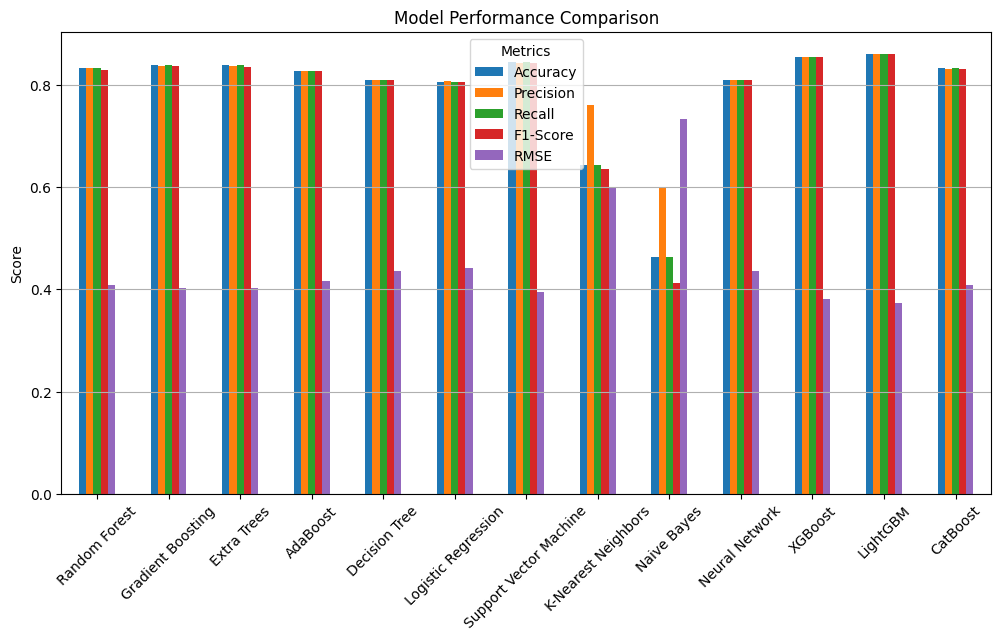

In [14]:
# Plot performance comparison
plot_performance(results, metrics=["Accuracy", "Precision", "Recall", "F1-Score", "RMSE"])


In [17]:
# Hyperpara,eter tuning
hyperparameter_grids = get_hyperparameter_grids()
# Load predefined hyperparameter grid
rf_param_grid = hyperparameter_grids["Random Forest"]

# Tune hyperparameters
best_rf_model, best_rf_params = tune_hyperparameters(models["Random Forest"], rf_param_grid, X_train, y_train)

print(f"Best Random Forest Model: {best_rf_model}")
print(f"Best Parameters: {best_rf_params}")



Best Random Forest Model: RandomForestClassifier(max_depth=20, n_estimators=200)
Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [18]:
#Apply Hyperparameter Tuning to Multiple Models

best_models = {}

for model_name, model in models.items():
    if model_name in hyperparameter_grids:  # Ensure a grid exists for this model
        print(f"Tuning {model_name}...")
        best_model, best_params = tune_hyperparameters(model, hyperparameter_grids[model_name], X_train, y_train)
        best_models[model_name] = best_model
        print(f"Best params for {model_name}: {best_params}")
    else:
        best_models[model_name] = model  # Use default model if no grid is available


Tuning Random Forest...
Best params for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Tuning Gradient Boosting...
Best params for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 200}
Tuning Extra Trees...
Best params for Extra Trees: {'max_depth': None, 'n_estimators': 100}
Tuning AdaBoost...
Best params for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Tuning Decision Tree...
Best params for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 10}
Tuning Support Vector Machine...
Best params for Support Vector Machine: {'C': 10, 'kernel': 'linear'}
Tuning K-Nearest Neighbors...
Best params for K-Nearest Neighbors: {'n_neighbors': 10}
Tuning Neural Network...
Best params for Neural Network: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}
Tuning XGBoost...


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params for XGBoost: {'learning_rate': 0.01, 'n_estimators': 100}
Tuning LightGBM...
[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.419418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Random Forest: Unique Predictions - [0 1]
Gradient Boosting: Unique Predictions - [0 1]
Extra Trees: Unique Predictions - [0 1]
AdaBoost: Unique Predictions - [0 1]
Decision Tree: Unique Predictions - [0 1]
Logistic Regression: Unique Predictions - [0 1]
Support Vector Machine: Unique Predictions - [0 1]
K-Nearest Neighbors: Unique Predictions - [0 1]
Naive Bayes: Unique Predictions - [0 1]
Neural Network: Unique Predictions - [0 1]


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:13:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Unique Predictions - [0 1]
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: Unique Predictions - [0 1]
CatBoost: Unique Predictions - [0 1]
Evaluating Random Forest...
{'Accuracy': 0.8212290502793296, 'Precision': 0.8270672444955636, 'Recall': 0.8212290502793296, 'F1 Score': 0.81458147504812, 'AUC-ROC': 0.8955204216073781}
Evaluating Gradient Boosting...
{'Accuracy': 0.8379888268156425, 'Precision': 0.8376367306699215, 'Recall': 0.8379888268156

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Accuracy': 0.7988826815642458, 'Precision': 0.8023486279986854, 'Recall': 0.7988826815642458, 'F1 Score': 0.7914041594291348, 'AUC-ROC': 0.9020421607378131}
Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

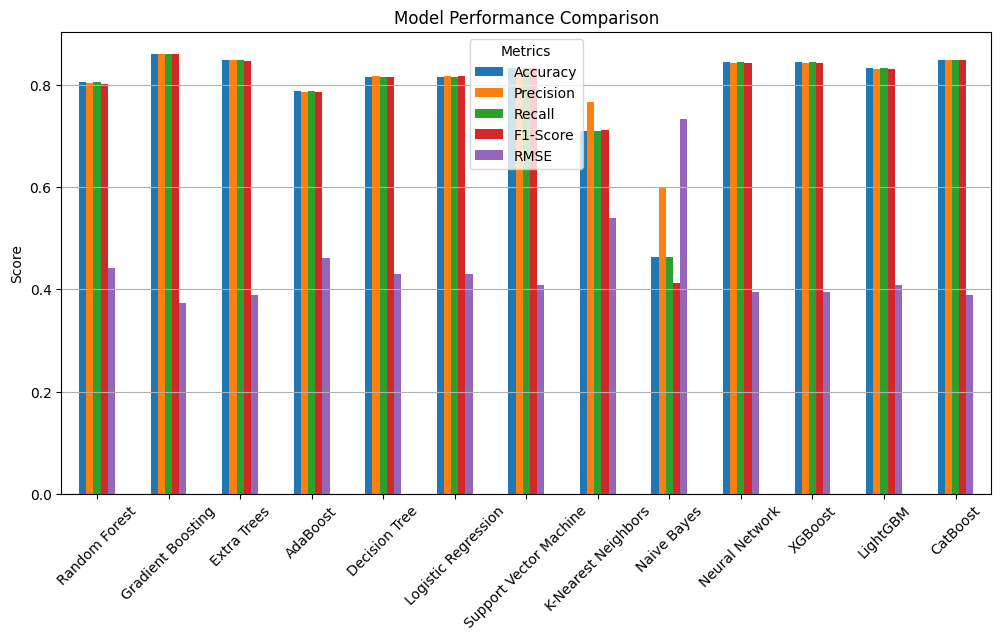

[LightGBM] [Info] Number of positive: 219, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.622802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384211 -> initscore=-0.471714
[LightGBM] [Info] Start training from score -0.471714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.633826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/v

[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.474821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/v

[LightGBM] [Info] Number of positive: 218, number of negative: 352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.447623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382456 -> initscore=-0.479136
[LightGBM] [Info] Start training from score -0.479136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.640584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 219, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384211 -> initscore=-0.471714
[LightGBM] [Info] Start training from score -0.471714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/v


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/v


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 218, number of negative: 352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.532825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382456 -> initscore=-0.479136
[LightGBM] [Info] Start training from score -0.479136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
# Train and Evaluate Tuned Models

# Train tuned models
results = train_models(X_train, X_test, y_train, y_test, selected_models=list(best_models.keys()), hyperparams={name: model.get_params() for name, model in best_models.items()})

# Display evaluation results
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model.fit(X_train, y_train), X_test, y_test)
    print(metrics)

# Plot performance comparison
plot_performance(results, metrics=["Accuracy", "Precision", "Recall", "F1-Score", "RMSE"])


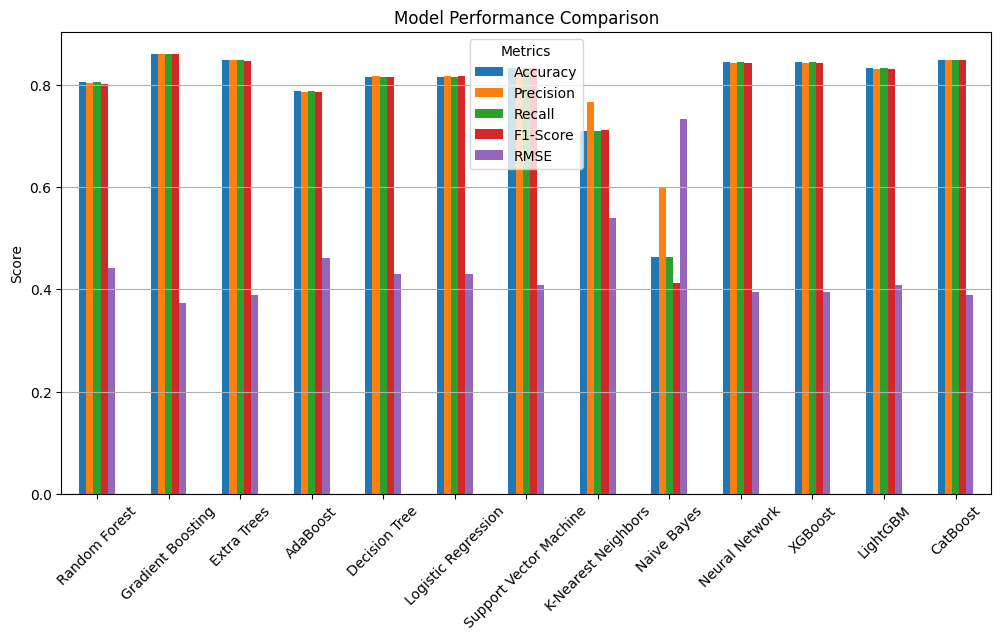

In [20]:
# Plot performance comparison
plot_performance(results, metrics=["Accuracy", "Precision", "Recall", "F1-Score", "RMSE"])

In [22]:
!jupyter nbconvert --to webpdf --output test.pdf Test.ipynb


[NbConvertApp] Converting notebook Test.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/nbconvert/exporters/webpdf.py", line 78, in main
    from playwright.async_api import async_playwright  # type: ignore[import-not-found]
ModuleNotFoundError: No module named 'playwright'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/magus/.pyenv/versions/magus/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instanc